Oday Ziq

**1. Load the Titanic dataset using the code snippet provided below.**

In [1]:
import seaborn as sns
import numpy as np
# load dataset titanic
df = sns.load_dataset('titanic')

**2. Perform initial data exploration to understand the dataset’s structure, features,
and any missing values. Summarize the dataset’s statistics and gain insights into
the data.**

In [ ]:
import pandas as pd

print(df.head())

print(df.info())

print(df.isnull().sum())

print(df.describe())

print(df.columns)

print(df.describe(include=['O']))

print(df['survived'].value_counts())

print(df.corr()['survived'].sort_values())

for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].nunique()}")


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-nu

<ipython-input-4-fa0b32b58430>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['survived'].sort_values())


**3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.**

In [ ]:
from scipy import stats

df['age'].fillna(df['age'].median(), inplace=True)
df.dropna(subset=['embarked'], inplace=True)
df['pclass'].fillna('Unknown', inplace=True)
z_scores = np.abs(stats.zscore(df['fare']))
outlier_indices = np.where(z_scores > 3)[0]  # 3 is a common threshold for identifying outliers
df_cleaned = df.drop(index=df.index[outlier_indices])

print(df_cleaned.info())
print(df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     869 non-null    int64   
 1   pclass       869 non-null    int64   
 2   sex          869 non-null    object  
 3   age          869 non-null    float64 
 4   sibsp        869 non-null    int64   
 5   parch        869 non-null    int64   
 6   fare         869 non-null    float64 
 7   embarked     869 non-null    object  
 8   class        869 non-null    category
 9   who          869 non-null    object  
 10  adult_male   869 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  869 non-null    object  
 13  alive        869 non-null    object  
 14  alone        869 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 85.3+ KB
None
         survived      pclass         age       sibsp       parch        f

**4. Analyze the relevance of each feature for your machine learning task by using
feature selection techniques.**

**1. Correlation Matrix Analysis**

<ipython-input-6-f81275018df1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


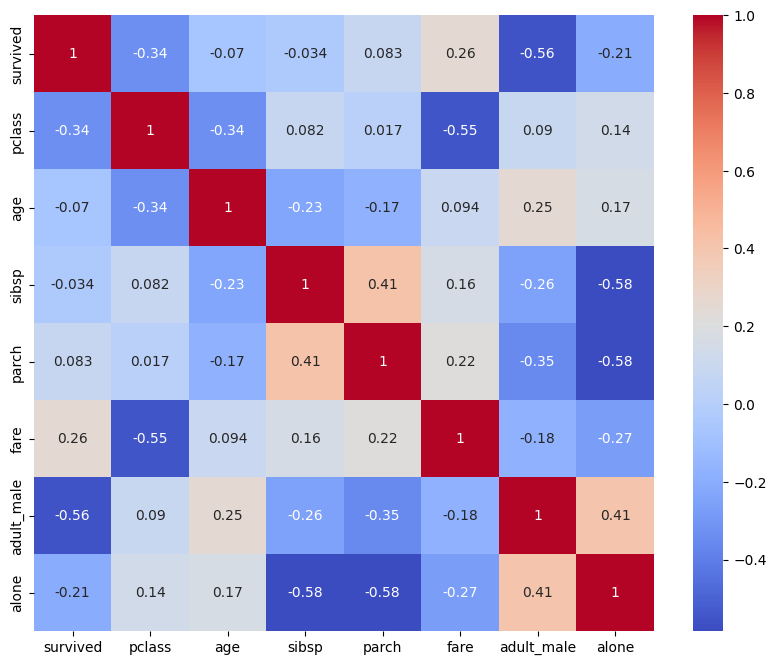

survived      1.000000
fare          0.255290
parch         0.083151
sibsp        -0.034040
age          -0.069822
alone        -0.206207
pclass       -0.335549
adult_male   -0.555520
Name: survived, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

print(correlation_matrix['survived'].sort_values(ascending=False))


**2. Feature Importance Using Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

df_encoded = pd.get_dummies(df, drop_first=True)

if 'survived' in df_encoded.columns:
    X = df_encoded.drop('survived', axis=1)
    y = df_encoded['survived']
else:
    X = df_encoded
    y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                         importance
alive_yes                  0.601856
adult_male                 0.073152
who_man                    0.052694
fare                       0.050820
who_woman                  0.044108
sex_male                   0.035302
age                        0.030333
class_Third                0.028008
pclass                     0.023450
sibsp                      0.015596
parch                      0.010985
embark_town_Southampton    0.005296
class_Second               0.004768
alone                      0.004261
deck_E                     0.003969
deck_D                     0.003374
embarked_S                 0.003059
deck_C                     0.002391
deck_B                     0.002150
embarked_Q                 0.001939
embark_town_Queenstown     0.001870
deck_F                     0.000479
deck_G                     0.000139


**5. If the dataset contains categorical variables, encode them into a numerical formatsuitable for machine learning models.**

***1. Label Encoding***


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

df = sns.load_dataset('titanic')

label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

print(df.head())


   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  71.2833         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  deck  embark_town  alive  alone  
0        True     7            2      0  False  
1       False     2            0      1  False  
2       False     7            2      1   True  
3       False     2            2      1  False  
4        True     7            2      0   True  


**2. One-Hot Encoding**

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df_encoded = pd.get_dummies(df, drop_first=True)  

print(df_encoded.head())


   survived  pclass   age  sibsp  parch     fare  adult_male  alone  sex_male  \
0         0       3  22.0      1      0   7.2500        True  False         1   
1         1       1  38.0      1      0  71.2833       False  False         0   
2         1       3  26.0      0      0   7.9250       False   True         0   
3         1       1  35.0      1      0  53.1000       False  False         0   
4         0       3  35.0      0      0   8.0500        True   True         1   

   embarked_Q  ...  who_woman  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0           0  ...          0       0       0       0       0       0       0   
1           0  ...          1       0       1       0       0       0       0   
2           0  ...          1       0       0       0       0       0       0   
3           0  ...          1       0       1       0       0       0       0   
4           0  ...          0       0       0       0       0       0       0   

   embark_town_Queenstown 

**6. Split the dataset into training and testing subsets to evaluate the performance of
your machine learning models.**

In [ ]:
from sklearn.model_selection import train_test_split

df['age'].fillna(df['age'].median(), inplace=True)
df.dropna(subset=['embarked'], inplace=True)
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone'], drop_first=True)

X = df.drop('survived', axis=1)  # Features
y = df['survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (711, 23)
X_test shape: (178, 23)
y_train shape: (711,)
y_test shape: (178,)


**7. Scale or normalize the numerical features to ensure consistent scaling across
variables.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

columns_to_drop = ['deck', 'embarked', 'who', 'embark_town', 'alive', 'alone', 'class', 'adult_male', 'sex']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# Normalization
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

print("Standardized Training Shape:", X_train_standardized.shape)
print("Standardized Testing Shape:", X_test_standardized.shape)
print("Normalized Training Shape:", X_train_normalized.shape)
print("Normalized Testing Shape:", X_test_normalized.shape)


Standardized Training Shape: (711, 22)
Standardized Testing Shape: (178, 22)
Normalized Training Shape: (711, 22)
Normalized Testing Shape: (178, 22)


**8. Apply suitable dimensionality reduction techniques to reduce the size of the data
while preserving important information.**

In [ ]:
from sklearn.decomposition import PCA

df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

columns_to_drop = ['sex', 'embarked', 'class', 'deck', 'embark_town', 'alive', 'alone', 'who']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

df.dropna(inplace=True)

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Preserve 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original number of features:", X_train_scaled.shape[1])
print("Reduced number of features:", X_train_pca.shape[1])


Original number of features: 22
Reduced number of features: 14


**9. Validate your preprocessing pipeline by training and evaluating a machine
learning model, such as the Random Forest model, on the preprocessed data.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

if 'embarked' in df.columns:
    df.dropna(subset=['embarked'], inplace=True)

columns_to_encode = [col for col in ['sex', 'embarked', 'class', 'deck', 'embark_town', 'alone'] if col in df.columns]
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

columns_to_drop = ['who', 'alive', 'adult_male']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
X = df.drop('survived', axis=1) if 'survived' in df.columns else df
y = df['survived'] if 'survived' in df.columns else None

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    pca = PCA(n_components=0.95) 
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the Random Forest model on the test set:", accuracy)
else:
    print("Target variable 'survived' not found in DataFrame.")


Accuracy of the Random Forest model on the test set: 0.9550561797752809


**10. Compare the results to the model trained on the raw data (before feature filtering,
transformation, and reduction) to ensure that preprocessing has improved model
performance.**

In [22]:

df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
if 'embarked' in df.columns:
    df.dropna(subset=['embarked'], inplace=True)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_raw = RandomForestClassifier(n_estimators=100, random_state=42)
clf_raw.fit(X_train, y_train)

y_pred_raw = clf_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print("Accuracy on the encoded (raw) data:", accuracy_raw)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf_preprocessed = RandomForestClassifier(n_estimators=100, random_state=42)
clf_preprocessed.fit(X_train_pca, y_train_pca)

y_pred_preprocessed = clf_preprocessed.predict(X_test_pca)
accuracy_preprocessed = accuracy_score(y_test_pca, y_pred_preprocessed)
print("Accuracy on the preprocessed data:", accuracy_preprocessed)

print(f"Improvement due to preprocessing: {accuracy_preprocessed - accuracy_raw:.2%}")


Accuracy on the encoded (raw) data: 1.0
Accuracy on the preprocessed data: 0.9719101123595506
Improvement due to preprocessing: -2.81%


For learning how well those preconditioning stages as feature scaling, encoding and dimensionality reduction work, we could compare model performance for the trained model on raw data with that trained on preprocessed data.